<a href="https://colab.research.google.com/github/pkams/MLOps-Zoomcamp/blob/main/ML_Zoomcamp_Week_1_Training_a_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
!wget https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2021-01.parquet https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2021-02.parquet

--2022-05-22 01:52:09--  https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2021-01.parquet
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.107.166
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.107.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1333519 (1.3M) [binary/octet-stream]
Saving to: ‘green_tripdata_2021-01.parquet.1’

green_tripdata_2021 100%[===================>]   1.27M  --.-KB/s    in 0.1s    

2022-05-22 01:52:09 (10.7 MB/s) - ‘green_tripdata_2021-01.parquet.1’ saved [1333519/1333519]

--2022-05-22 01:52:09--  https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2021-02.parquet
Reusing existing connection to s3.amazonaws.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1145679 (1.1M) [binary/octet-stream]
Saving to: ‘green_tripdata_2021-02.parquet’

green_tripdata_2021 100%[===================>]   1.09M  --.-KB/s    in 0.02s   

2022-05-22 01:52:09 (52.9 MB/s) - ‘green_tripdata_2021-02.parquet’ sa

In [19]:
df = pd.read_parquet('/content/green_tripdata_2021-01.parquet')
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.50,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.50,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.50,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.50,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.00,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,2.75,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,0.00,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,2.75,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,2.75,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN


In [20]:
df['duration'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).dt.seconds / 60

In [21]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,...,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


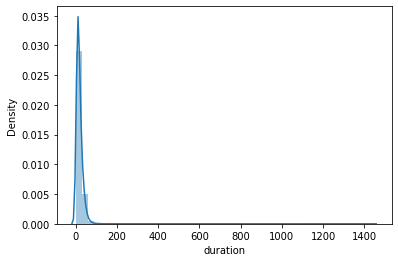

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# distribution
sns.distplot(df.duration)

In [23]:
df.duration.describe()

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
25%          8.000000
50%         13.883333
75%         23.000000
max       1439.600000
Name: duration, dtype: float64

In [24]:
df.duration.describe(percentiles=[0.95, 0.98, 0.99])

count    76518.000000
mean        19.927896
std         59.338594
min          0.000000
50%         13.883333
95%         44.000000
98%         56.000000
99%         67.158167
max       1439.600000
Name: duration, dtype: float64

In [25]:
# How much of the points are localized between these two limits?
((df.duration >=1) & (df.duration <=60)).mean()

0.9658903787344154

In [27]:
df = df[((df.duration >=1) & (df.duration <=60))]

In [28]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [30]:
df[categorical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [31]:
df[categorical] = df[categorical].astype(str)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [32]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()

In [34]:
df[categorical + numerical].iloc[:10]

,PULocationID,DOLocationID,trip_distance
0,43,151,1.01
1,166,239,2.53
2,41,42,1.12
3,168,75,1.99
7,75,75,0.45
9,225,265,12.19
10,244,244,3.39
11,75,213,6.69
12,74,238,2.34
13,74,60,5.48


In [35]:
df[categorical + numerical].iloc[:10].to_dict(orient='records')

[{'DOLocationID': '151', 'PULocationID': '43', 'trip_distance': 1.01},
 {'DOLocationID': '239', 'PULocationID': '166', 'trip_distance': 2.53},
 {'DOLocationID': '42', 'PULocationID': '41', 'trip_distance': 1.12},
 {'DOLocationID': '75', 'PULocationID': '168', 'trip_distance': 1.99},
 {'DOLocationID': '75', 'PULocationID': '75', 'trip_distance': 0.45},
 {'DOLocationID': '265', 'PULocationID': '225', 'trip_distance': 12.19},
 {'DOLocationID': '244', 'PULocationID': '244', 'trip_distance': 3.39},
 {'DOLocationID': '213', 'PULocationID': '75', 'trip_distance': 6.69},
 {'DOLocationID': '238', 'PULocationID': '74', 'trip_distance': 2.34},
 {'DOLocationID': '60', 'PULocationID': '74', 'trip_distance': 5.48}]

In [36]:
train_dicts = df[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [37]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

In [39]:
target = 'duration'
y_train = df[target].values

In [40]:
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_train)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

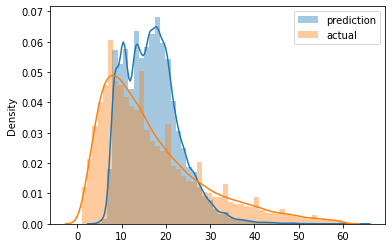

In [43]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()
plt.plot()

In [44]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred, squared=False)

9.775464329504265

Putting everything in a function

In [61]:
def read_dataframe(path):
  df = pd.read_parquet(path)
  df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
  df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
  df['duration'] = (df.lpep_dropoff_datetime - df.lpep_pickup_datetime).dt.seconds / 60

  df = df[((df.duration >=1) & (df.duration <=60))]
  return df

In [62]:
df_train = read_dataframe('/content/green_tripdata_2021-01.parquet')
df_val = read_dataframe('/content/green_tripdata_2021-02.parquet')

In [63]:
len(df_train), len(df_val)

(73908, 61921)

In [64]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df_train[categorical] = df_train[categorical].astype(str)
df_val[categorical] = df_val[categorical].astype(str)

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

valid_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(valid_dicts)

In [54]:
target = 'duration'

y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

9.775464329504265

In [55]:
y_pred_val = lr.predict(X_val)
mean_squared_error(y_val, y_pred_val, squared=False)

10.473883109825488

Lasso Model

In [58]:
from sklearn.linear_model import Lasso
lr = Lasso()
lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)
mean_squared_error(y_val, y_pred_val, squared=False)

12.212583224318818

Interaction Feature

In [67]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [68]:
categorical = ['PU_DO']
numerical = ['trip_distance']

df_train[categorical] = df_train[categorical].astype(str)
df_val[categorical] = df_val[categorical].astype(str)

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

valid_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(valid_dicts)

In [71]:
target = 'duration'

y_train = df_train[target].values
y_val = df_val[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

7.4795869498500265

Save Model

In [73]:
!mkdir models

In [74]:
import pickle

with open('models/lin_reg.bin', 'wb') as f_out:
  pickle.dump((dv, lr), f_out)

In [75]:
# The pickle contains the vectorizer and the linear regression
# We will load as: dv, lr = pickle.load(...)